# Paquetes y libreria

In [42]:
import numpy as np
import matplotlib.pyplot as plt
!pip install itk
import itk
import skimage
from skimage import morphology
import scipy

# Importo Drive

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


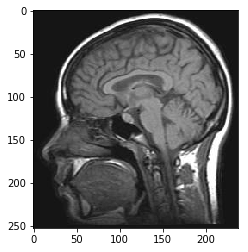

In [38]:
image = itk.imread('/content/drive/My Drive/PIBM_2019_2C/Trabajos Prácticos/TP 2 - Mejoramiento/Imagen 24.jpg')
matrix = itk.GetArrayFromImage(image)
plt.imshow(matrix,cmap = 'gray')

In [39]:
matrix.dtype

dtype('uint8')

In [21]:
col

512

**Para ver la resolucion para ecualizado y escalado**

In [14]:
matrix.dtype

dtype('uint8')

# Filtro Promediador

In [0]:
def FiltroPromediador(matrix,n,fil,col):

  # Genero el filtro promediador
  if n % 2 == 0:
    raise ValueError('A very specific bad thing happened.')
  else:
    #kernel es el tama;o de mi matriz kernel
    kernel = n
    movkernel = int(kernel/2)
    matrizpromedio = matrix #np.zeros((fil,col))
    factor = 1/(kernel*kernel)
    for i in range(fil):    
      for j in range(col):
        promedio = 0
        if i < fil-1 and i > 0 and j > 0 and j < col-1:
          for k in range(-movkernel, movkernel+1):
            for l in range(-movkernel, movkernel+1):
              if (i+k >= 0 and j+l >= 0 and i+k <= col and j+l < fil ):
                hola = factor*matrix[i+k][j+l]
                promedio = promedio + hola
                
          matrizpromedio[i][j] = promedio      
    return matrizpromedio

# Filtro Mediana

In [0]:
def FiltroMediana(tamanokernel,matrix):
  (fil,col) = matrix.shape
  filtromediana = matrix.copy()
  movkernel = int(tamanokernel/2)

  for f in range(fil):
    for c in range(col):
      if f >= movkernel and c >= movkernel and f < fil-movkernel and c < col - movkernel :
        array = []
        if f < fil-1 and f > 0 and c > 0 and c < col-1:
          for k in range(-movkernel, movkernel+1):
            for l in range(-movkernel, movkernel+1):

              if (f-movkernel >= 0 and c-movkernel >= 0 and f-movkernel < fil and c-movkernel < col ):
                array.append(matrix[f+k][c+l])
          array = np.sort(array)
          if not (len(array) % 2): # esto dice que si el largo del vector es PAR
            mediana = np.mean([array[int(np.floor(len(array)/2))-1],array[int(np.floor(len(array)/2) + 1)-1]])

          else:
            mediana = array[int(np.floor(len(array)/2))]
          filtromediana[f][c] = mediana

          mediana = 0
  return(filtromediana)
# ME FALTA CORREGIR PORQUE K Y L NO EMPIEZAN EN -2

In [128]:
agus = FiltroMediana(3,matrix)

[[16.  8. 11.  9.  2. 18. 10. 11.  2.  3.]
 [ 5.  9. 10. 11. 11.  7.  8.  8.  9. 14.]
 [ 9.  8.  8. 11. 11.  7.  6.  7.  9. 10.]
 [19.  9.  8.  8. 11.  8.  7.  7.  8. 19.]
 [15. 15.  8.  8. 17. 18.  8.  8.  8.  2.]
 [13. 15. 14. 10. 15. 17. 15. 11. 11.  2.]
 [ 4. 14. 14. 14. 14. 15. 15. 11. 14. 15.]
 [12. 12.  8. 10. 10. 13. 14. 11. 14. 16.]
 [10. 10.  8. 13. 13. 13. 14. 12. 14. 18.]
 [ 4.  4. 17.  8. 13. 13.  3. 17. 12. 18.]]


# Filtro Convolucion

In [0]:
def Convolucion(tamanokernel, kernel, matrix):
  (fil,col) = matrix.shape
  filtromediana = matrix.copy()
  movkernel = int(tamanokernel/2)
  matrixconv = matrix.copy()

  for f in range(fil):
    for c in range(col):
      sum = 0
      if f >= movkernel and c >= movkernel and f < fil-movkernel and c < col - movkernel :
        if f < fil-1 and f > 0 and c > 0 and c < col-1:
          for k in range(-movkernel, movkernel+1):
            for l in range(-movkernel, movkernel+1):
              if (f-movkernel >= 0 and c-movkernel >= 0 and f-movkernel < fil and c-movkernel < col ):  
                            
                sum = sum + matrix[f+k][c+l]*kernel[movkernel + k][movkernel + l]
                
        matrixconv[f][c] = sum
  return(matrixconv)

# Convol Mili

In [0]:
def Convolucion(matrix,filtro):

  (fil,col) = matrix.shape

  (size,size2) = filtro.shape
  #aca hago el zero padding

  zp = size-1
  matrixseg=np.zeros((fil+zp,col+zp))

  h2=zp/2
  for i in range(fil):
    for j in range(col):
      matrixzp[i+int(h2),j+int(h2)]=matrix[i,j]

  convolucionada=np.zeros((fil+m,col+m))

  for i in range(fil+size):
    for j in range(col+size):
      if j + size < col + size and i + size < fil + size :
        signal = matrixzp[i : i + size, j : j + size]

        if i+h2<fil+m and j+h2<col+m:
          convolucionada[i+int(h2)][j+int(h2)]=(filtro*signal).sum()

  convolfinal=np.zeros((fil,col))

  for i in range(fil):
    for j in range(col):
      convolfinal[i,j]=convolucionada[i+int(h2),j+int(h2)]

  return final

# Zero Crossing

-8.0
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0. 255.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


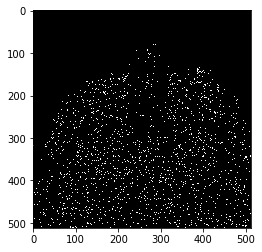

In [27]:
# def ZeroCrossing (matrix):

Laplaciano = [[1, 1, 1],
              [1, -8, 1],
              [1, 1, 1]]
Gx = [[-1, -2, -1],[0, 0, 0],[1, 2, 1]]
Gy = np.rot90(Gx)
tamanoKernel = len(Laplaciano)
fil,col = matrix.shape
laplaciano = convol(fil,col,matrix, Laplaciano,len(Laplaciano))
gradienteX = Convolucion(len(Gx), Gx, matrix)
gradienteY = Convolucion(len(Gy), Gy, matrix)

(fil,col) = matrix.shape


cruces = np.zeros((fil,col))

for f in range(fil):
  for c in range(col):

    if f > 0 and c > 0 and f < fil-1 and c < col-1 :
      
      if laplaciano[f][c] < 0 and laplaciano[f][c-1] > 0:
        if gradienteX[f][c] > 250 or gradienteX[f][c] < -250:
          cruces[f][c] = 255
          
      if laplaciano[f][c] > 0 and laplaciano[f][c-1] < 0 :
        if gradienteX[f][c] > 250 or gradienteX[f][c] < -250:
          cruces[f][c] = 255

      if laplaciano[f][c] == 0 and laplaciano[f][c-1] > 0 and laplaciano[f][c+1] < 0:
        if gradienteX[f][c] > 250 or gradienteX[f][c] < -250:
          cruces[f][c] = 255

      if laplaciano[f][c] == 0 and laplaciano[f][c-1] < 0 and laplaciano[f][c+1] > 0:
        if gradienteX[f][c] > 250 or gradienteX[f][c] < -250:
          cruces[f][c] = 255

      if laplaciano[f][c] < 0 and laplaciano[f-1][c] > 0 :
        if gradienteY[f][c] > 250 or gradienteY[f][c] < -250:
          cruces[f][c] = 255

      if laplaciano[f][c] > 0 and laplaciano[f-1][c] < 0 :
        if gradienteY[f][c] > 250 or gradienteY[f][c] < -250:
          cruces[f][c] = 255

      if laplaciano[f][c] == 0 and laplaciano[f-1][c] < 0 and laplaciano[f+1][c] > 0:
        if gradienteY[f][c] > 250 or gradienteY[f][c] < -250:
          cruces[f][c] = 255

      if laplaciano[f][c] == 0 and laplaciano[f-1][c] > 0 and laplaciano[f+1][c] < 0:
        if gradienteY[f][c] > 250 or gradienteY[f][c] < -250:
          cruces[f][c] = 255

      if laplaciano[f][c] > 0 and laplaciano[f+1][c] < 0 :
        if gradienteY[f][c] > 250 or gradienteY[f][c] < -250:
          cruces[f][c] = 255

      if laplaciano[f][c] < 0 and laplaciano[f+1][c] > 0 :
        if gradienteY[f][c] > 250 and gradienteY[f][c] < -250 :
          cruces[f][c] = 255

      if laplaciano[f][c] > 0 and laplaciano[f][c + 1] < 0 :
        if gradienteY[f][c] > 250 and gradienteX[f][c] < -250:
          cruces[f][c] = 255

      if laplaciano[f][c] < 0 and laplaciano[f][c+1] > 0 :
        if gradienteX[f][c] > 250 and gradienteX[f][c] < -250:
          cruces[f][c] = 255
print(cruces)
plt.imshow(cruces,cmap = 'gray')
#   return(cruces)

In [87]:
print(laplaciano[305][290])

65420


# Zero crossing Mili

5226.720932841164


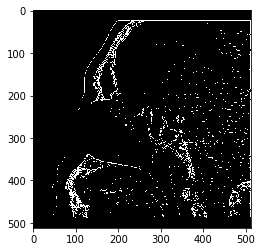

In [37]:
plt.imshow(zerocrossing(matrix),cmap = 'gray')
plt.show()

# Escalamiento

In [0]:
def Escalamiento(matrix):
  
  max = np.amax(matrix)
  min = np.amin(matrix)
  max_int = 255
  (fil,col) = matrix.shape
  escalamiento = matrix.copy()

  for f in range(fil):
    for c in range(col):
      if matrix[f][c] > min and matrix[f][c] < max:
        intensidad = (matrix[f][c] - min)/(max - min)
        intensidad = intensidad * 255
        escalamiento[f][c] = int(intensidad)

  return(escalamiento)

# Ecualizacion

In [0]:
def Ecualizacion(matrix,maxintensidad): 
  #Para el histograma
  fil,col = matrix.shape

  h = np.zeros((int(maxintensidad)))

  for i in range(fil):
    for j in range(col):
      h[int(matrix[i][j])] = h[int(matrix[i][j])] + 1

  H = np.zeros((fil))

  H = np.cumsum(h)/(fil*col)
  #index = np.arange(len(H))
  #plt.bar(index, H ,align='center')

  #Ecualizacion
  imax = np.amax(matrix) # OJO ACA VA LA RESOLUCION EJ 255 O 511 O 1023
#   print(imax)
  g = (imax - 1) * H

  ecualizado = np.zeros((fil,col))
  for f in range(fil):
    for c in range(col):
#       print('matrix[f][c]' + str(int(matrix[f][c])))
      ecualizado[f][c] = g[int(matrix[f][c])]

  #plt.imshow(ecualizado,cmap = 'gray')
  #plt.show()
  
  return(ecualizado)

In [0]:
  ecualizado = np.zeros((fil,col))
  for f in range(fil):
    for c in range(col):
#       print('matrix[f][c]' + str(int(matrix[f][c])))
      ecualizado[f][c] = g[int(matrix[f][c])]

  #plt.imshow(ecualizado,cmap = 'gray')
  #plt.show()
  
  return(ecualizado)

In [0]:
ec = Ecualizacion(matrix)

# Ecualizacion local Mili

In [0]:
def eqlocal (size, matrix, maximo):

  fil,col=matrix.shape

  filtrada=np.zeros((fil,col))
  h2=int((size-1)/2)

  for i in range(fil):
    for j in range(col):
      if j+h2<col and i+h2<fil and i-h2>=0 and j-h2>=0 :      
        signal=matrix[i-h2:i+h2+1,j-h2:j+h2+1]
      
      if i-h2<0:
        if j-h2<0:
          signal=matrix[0:i+h2+1,0:j+h2+1]
        if j-h2>=0 and j+h2<col :
          signal=matrix[0:i+h2+1,j-h2:j+h2+1]
        if j+h2>=col :
          signal= matrix[0:i+h2+1,j-h2: col-1]
      if j-h2<0:
        if i-h2>=0 and i+h2<fil :
          signal=matrix[i-h2:i+h2+1,0:j+h2+1]
        if i+h2>=fil: 
          signal= matrix[i-h2:fil-1,0:j+h2+1]      
      if i+h2>=fil :
        if j+h2>=col:
           signal= matrix[i-h2:fil-1,j-h2:col-1]
        if j-h2>=0 and j+h2<col:
           signal= matrix[i-h2:fil-1,j-h2:j+h2+1] 
      if j+h2>=col:
        if i-h2>=0 and i+h2<fil:
           signal= matrix[i-h2:i+h2+1,j-h2:col-1]  
      if signal.size!=0:
        H = eqhist(signal, maximo) 
              
        filtrada[i,j] = H[matrix[i,j]]
         


  
  return filtrada

In [41]:
eqlocal(matrix,7)

TypeError: ignored

# Ecualizacion local

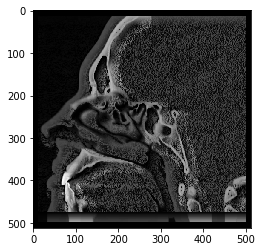

In [66]:

fil,col = matrix.shape
eclocal = np.zeros((fil,col))
tamanokernel = 25
movkernel = int(tamanokernel/2)

for f in range(fil):
  for c in range(col):
    minimatriz = np.zeros((tamanokernel,tamanokernel))
    if f >= movkernel and c >= movkernel and f < fil-movkernel and c < col - movkernel :
      if f < fil-1 and f > 0 and c > 0 and c < col-1:
        for k in range(-movkernel, movkernel+1):

          for l in range(-movkernel, movkernel+1):

            if (f-movkernel >= 0 and c-movkernel >= 0 and f-movkernel < fil and c-movkernel < col ):
              minimatriz[k][l] = matrix[f+k][c+l]
       
        matrizdeecualizadolocal = Ecualizacion(minimatriz,4095)
        eclocal[f][c] = matrizdeecualizadolocal[int(tamanokernel/2)][int(tamanokernel/2)]

      
plt.imshow(eclocal, cmap = 'gray')
plt.show()

In [0]:
h = np.zeros((int(maxintensidad)))

In [54]:
len(h)

4094

# Matriz

In [179]:
matrix

array([[60., 61., 26.,  6., 59., 65., 85., 50., 10., 73.],
       [30.,  8., 82.,  9., 44., 15., 51., 60., 24., 25.],
       [19., 19., 52., 27., 54., 47., 27., 47.,  8., 24.],
       [ 2., 82., 22., 83., 68.,  8., 77., 81., 32., 37.],
       [40., 47., 31., 22.,  5., 87., 51., 73., 82., 68.],
       [43., 25., 36.,  8., 19., 52.,  0., 83., 43., 41.],
       [43., 56.,  1., 27., 69., 21., 21., 59., 67., 25.],
       [18., 18.,  3., 72., 80., 27., 60., 80., 45., 58.],
       [20., 46., 12., 76., 31., 89., 57., 66.,  3.,  4.],
       [56., 21., 44., 19., 34., 74., 82., 51., 52.,  6.]])

In [177]:
matrix = np.zeros((10,10))
for i in range(10):
  for j  in range(10):
    matrix[i][j] = np.random.randint(90)
print(matrix)

[[60. 61. 26.  6. 59. 65. 85. 50. 10. 73.]
 [30.  8. 82.  9. 44. 15. 51. 60. 24. 25.]
 [19. 19. 52. 27. 54. 47. 27. 47.  8. 24.]
 [ 2. 82. 22. 83. 68.  8. 77. 81. 32. 37.]
 [40. 47. 31. 22.  5. 87. 51. 73. 82. 68.]
 [43. 25. 36.  8. 19. 52.  0. 83. 43. 41.]
 [43. 56.  1. 27. 69. 21. 21. 59. 67. 25.]
 [18. 18.  3. 72. 80. 27. 60. 80. 45. 58.]
 [20. 46. 12. 76. 31. 89. 57. 66.  3.  4.]
 [56. 21. 44. 19. 34. 74. 82. 51. 52.  6.]]


# Guia

Ej 1

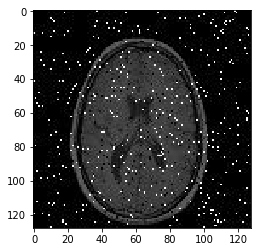

In [16]:
image1 = itk.imread('/content/drive/My Drive/PIBM_2019_2C/Trabajos Prácticos/TP 2 - Mejoramiento/Imagen 1.jpg')
matrix1 = itk.GetArrayFromImage(image1)
plt.imshow(matrix1,cmap = 'gray')
fil,col = matrix1.shape

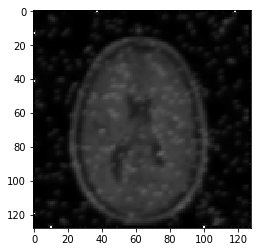

In [8]:
imagen1confiltropromediador = FiltroPromediador(matrix1,3,fil,col)
plt.imshow(imagen1confiltropromediador,cmap = 'gray')

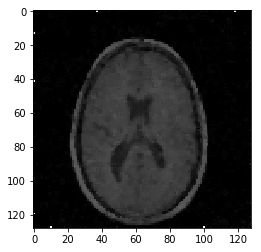

In [17]:
imagen1confiltromediana = FiltroMediana(3,matrix1)
plt.imshow(imagen1confiltromediana,cmap = 'gray')

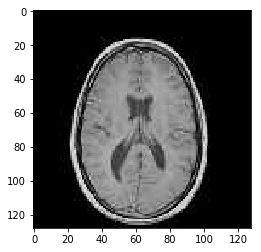

In [19]:
image2 = itk.imread('/content/drive/My Drive/PIBM_2019_2C/Trabajos Prácticos/TP 2 - Mejoramiento/Imagen 2.jpg')
matrix2 = itk.GetArrayFromImage(image2)
plt.imshow(matrix2,cmap = 'gray')
fil,col = matrix2.shape

Ej 5

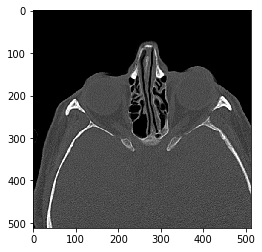

In [20]:
image25 = itk.imread('/content/drive/My Drive/PIBM_2019_2C/Trabajos Prácticos/TP 2 - Mejoramiento/Imagen 25.jpg')
matrix25 = itk.GetArrayFromImage(image25)
plt.imshow(matrix25,cmap = 'gray')
fil,col = matrix25.shape

In [46]:
imagen25conzero = ZeroCrossing(matrix25)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [ 23  36   4 ...  37  63  67]
 [ 11  34   5 ... 182 250  83]
 [ 13   0   1 ...  86  72  71]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


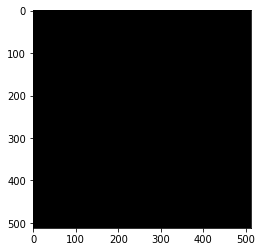

In [47]:
plt.imshow(imagen25conzero,cmap = 'gray')